In [1]:
import numpy as np
import pandas as pd 
import sys
from time import time
import seaborn as sns
#from numpy.core.umath_tests import matrix_multiply
from sklearn.model_selection import train_test_split
#from numpy.core.umath_tests import inner1d
import random
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data1=pd.read_csv('train_new.csv',na_values=['NaN'],keep_default_na=False)
data2=pd.read_csv('test.csv',na_values=['NaN'],keep_default_na=False)

In [3]:
train_target = data1['SalePrice']
train_cols = data1.columns[:-1]
train_set = data1[train_cols]
data = pd.concat([train_set,data2])

In [4]:
cats=set(['SaleCondition','OverallCond','LotConfig','MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',\
'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',\
'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',\
'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',\
'GarageCond','PavedDrive','SaleCondition','SaleType'])
bins = ['YearBuilt','GarageYrBlt','PoolQC','Fence']
#to_drop = ['YearRemodAdd','PoolQC','MoSold','Fence','MiscFeature','MiscVal','YrSold']
to_drop = ['YearRemodAdd','MoSold','MiscFeature','MiscVal','YrSold']
data = data.drop(to_drop,axis=1)

In [5]:
flags = data.loc[:,'LotFrontage']=='NA'
data.loc[flags,'LotFrontage']=0
flags = data.loc[:,'MasVnrArea']=='NA'
data.loc[flags,'MasVnrArea']=0
flags = data.loc[:,'BsmtFinSF1']=='NA'
data.loc[flags,'BsmtFinSF1']=0
flags = data.loc[:,'BsmtFinSF2']=='NA'
data.loc[flags,'BsmtFinSF2']=0
flags = data.loc[:,'BsmtUnfSF']=='NA'
data.loc[flags,'BsmtUnfSF']=0
flags = data.loc[:,'TotalBsmtSF']=='NA'
data.loc[flags,'TotalBsmtSF']=0
flags = data.loc[:,'BsmtFullBath']=='NA'
data.loc[flags,'BsmtFullBath']=0
flags = data.loc[:,'BsmtHalfBath']=='NA'
data.loc[flags,'BsmtHalfBath']=0
flags = data.loc[:,'GarageCars']=='NA'
data.loc[flags,'GarageCars']=0
flags = data.loc[:,'GarageArea']=='NA'
data.loc[flags,'GarageArea']=0

In [6]:
for each in data.columns:
    if each not in cats and each not in bins and each!='Id'and each!='SalePrice':
        data[each] = data[each].astype('int64')

In [7]:
scaled_features = {}
for each in data.columns:
    if each not in cats and each not in bins and each!='Id':
        mean, std = data[each].mean(), data[each].std()
        scaled_features[each] = [mean, std]
        data.loc[:, each] = (data[each] - mean)/std
mean, std = train_target.mean(), train_target.std()
scaled_features['SalePrice'] = [mean, std]
train_target = (train_target - mean)/std



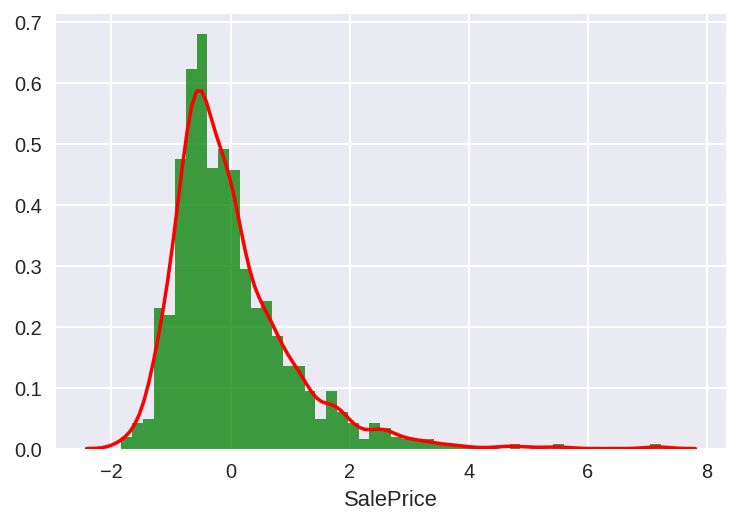

In [8]:
plt.figure()
plt.hist(train_target, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('SalePrice')
plt.grid(True)
#plt.figure()
sns.distplot(train_target, hist=False, rug=False,color="r")

In [ ]:
est_levels = data.Exterior1st.value_counts().keys()
bsmtfin2_levels = data.BsmtFinType2.value_counts().keys()
bsmtfin1_levels = data.BsmtFinType1.value_counts().keys()
cond1_levels = data.Condition1.value_counts().keys()
cond2_levels = data.Condition2.value_counts().keys()

In [ ]:
for each in cats:
    dummies = pd.get_dummies(data[each], prefix=each, drop_first=False)
    data = pd.concat([data, dummies], axis=1)
data = data.drop(list(cats), axis=1)

In [ ]:
#Merge similar columns to one
#'Exterior1st','Exterior2nd','BsmtFinType1','BsmtFinType2','Condition1','Condition2'
#delete Exterior1st_NA and Exterior2nd_NA, merge others
#BsmtFinType1,2_NA


In [ ]:
for level in cond2_levels:
    cond1 = 'Condition1_'+level
    cond2 = 'Condition2_'+level
    data.loc[:,cond1] += data.loc[:,cond2]
    data = data.drop([cond2],axis=1)

In [ ]:
for level in bsmtfin1_levels:
    cond1 = 'BsmtFinType1_'+level
    cond2 = 'BsmtFinType2_'+level
    data.loc[:,cond1] += data.loc[:,cond2]
    data = data.drop([cond2],axis=1)

In [ ]:
for level in est_levels:
    cond1 = 'Exterior1st_'+level
    cond2 = 'Exterior2nd_'+level
    if level =='CemntBd':
        cond2 = 'Exterior2nd_CmentBd'
    if level =='WdShing':
        cond2 = 'Exterior2nd_Wd Shng'
    if level == 'BrkComm':
        cond2 = 'Exterior2nd_Brk Cmn'
    data.loc[:,cond1] += data.loc[:,cond2]
    data = data.drop([cond2],axis=1)

In [ ]:
data = data.drop(['BsmtFinType1_','Exterior2nd_Other','BsmtFinType1_NA','Exterior1st_NA'], axis=1)

In [ ]:
flags = (data.loc[:,'GarageYrBlt']==0.0)|(data.loc[:,'GarageYrBlt']=='NA')|(data.loc[:,'GarageYrBlt']==2207)
data.loc[flags,'GarageYrBlt']=0
data['GarageYrBlt'] = data['GarageYrBlt'].astype('int64')

In [ ]:
for i in range(0,100,10):
    s= 'GarageYr'+str(i)+'_'+str(i+9)
    lower = 1900+i
    upper = 1900+i+10
    data[s] = (data.loc[:,'GarageYrBlt']>=lower) & (data.loc[:,'GarageYrBlt']<upper)
data['GarageYr1900'] = (data.loc[:,'GarageYrBlt']<1990)
data['GarageYr2000'] = (data.loc[:,'GarageYrBlt']>1999)
data=data.drop('GarageYrBlt',axis=1)

In [ ]:
for i in range(0,100,10):
    s= 'bet'+str(i)+'_'+str(i+9)
    lower = 1900+i
    upper = 1900+i+10
    data[s] = (data.loc[:,'YearBuilt']>=lower) & (data.loc[:,'YearBuilt']<upper)
data['before1900'] = (data.loc[:,'YearBuilt']<1990)
data['after2000'] = (data.loc[:,'YearBuilt']>1999)
data=data.drop('YearBuilt',axis=1)

In [ ]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoidGradient(x):
    return x*(1-x)

class Network():
    
    def __init__(self,size,learning_rate):
        self.sizes = size
        self.num_layers = len(size)
        self.biases = [np.random.normal(0,b**-0.5,(1,b)) for b in self.sizes[1:]] 
        self.weights = [np.random.normal(0,x**-0.5,(x,y)) for x,y in zip(self.sizes[:-1],self.sizes[1:])]
        self.learning_rate = learning_rate
        self.activation = sigmoid
        self.gradient = sigmoidGradient
        
    def FeedForward(self,batch):
        """Performs forward propagation for a batch of training data
           returns a list of activations and gradients"""
        activations =[batch]
        gradients=[]
        inputs = batch
        
        for i in range(self.num_layers-1):
            if i== self.num_layers-2:  #Regression problem, No need of sigmoid for this layer
                z=np.einsum('ijk,kl->ijl',inputs,self.weights[i])+self.biases[i]
                #zs.append(z)
                activations.append(z)
                gradients.append(1) #gradient =1: f(X)=X
                break  
            z=np.einsum('ijk,kl->ijl',inputs,self.weights[i])+self.biases[i]
            activation = self.activation(z)
            inputs=activation
            activations.append(activation) 
            gradient = self.gradient(activation)
            gradients.append(self.gradient(activation))
        return gradients,activations
    
    def train(self,batch,target):
        m = batch.shape[0]
        del_b = [np.stack([np.zeros(b.shape)]*m) for b in self.biases]
        del_w = [np.stack([np.zeros(w.shape)]*m) for w in self.weights]
        
        #Feed forward
        gradients,activations = self.FeedForward(batch)
        
        #Back propagation
        delta = (target-activations[-1])
        del_b[-1] = delta   
        del_w[-1] = np.einsum('ijk,ikl->ilj',delta,activations[-2]) 
        
        for i in range(2,self.num_layers):
            delta = np.einsum('ijk,lk->ijl',delta,self.weights[-i+1])*gradients[-i]
            del_b[-i] = delta
            del_w[-i] = np.einsum('ijk,ijl->ilk',delta,activations[-i-1])
            #with open('/home/dpk/WtUp2','wb') as f:np.savetxt(f,temp)

        for i in range(len(self.weights)):
            b_shape = self.biases[i].shape
            w_shape = self.weights[i].shape
            del_b_cum = (self.learning_rate*del_b[i].sum(axis=(0,1))/m).reshape(b_shape)   #summing up and taking average of updates
            del_w_cum = self.learning_rate*del_w[i].sum(axis=0)/m
            self.biases[i] += del_b_cum
            self.weights[i] = (1-(self.learning_rate*.1/1460))*self.weights[i]+del_w_cum
    
    def SGD(self,data,targets,epochs,mini_batch_size):
        """Stochastic Gradient Descent: Performs update on biases and weights"""
        n = len(data)
        for j in xrange(epochs):
            mini_batches = [data[k:k+mini_batch_size] for k in xrange(0, n, mini_batch_size)]
            target_list = [targets[k:k+mini_batch_size] for k in xrange(0, n, mini_batch_size)] 
            for mini_batch,target in zip(mini_batches,target_list):     #update parameters for each mini-batch
                #mini_batch = mini_batch.reshape(shape)
                self.train(mini_batch, target)
        

In [ ]:
data = data.drop(['Id'],axis=1)
data= data.astype(float)
#data=data.apply(pd.to_numeric)
test=data.tail(len(data)-1460)
train = data.head(1460)
X_train, X_test, y_train, y_test = train_test_split(train, train_target, test_size=0.15, random_state=42)
#X_train, X_test, y_train, y_test = X_train.as_matrix(), X_test.as_matrix(), y_train.as_matrix(), y_test.as_matrix()
#train = train.reshape(-1,1,313)
X_train=X_train.as_matrix()
X_test=X_test.as_matrix()
y_test=y_test.as_matrix()
y_train=y_train.as_matrix()

In [ ]:
X_train = X_train.reshape((-1,1,313))
y_train = y_train.reshape((-1,1,1))

In [ ]:
#n =Network([313,250,150,75,1],0.01)
n =Network([313,200,100,1],0.01)

In [ ]:
t=time()
print "Started at ",t

In [ ]:
n.SGD(X_train,y_train,1000,100)

In [ ]:
t2 = time()
print "Finished at ",t2," took",(t2-t)/60

In [ ]:
X_test=test.as_matrix()
X_test=X_test.reshape((-1,1, 313))
g,a=n.FeedForward(X_test)

In [ ]:
vals = a[-1]*scaled_features['SalePrice'][1]+scaled_features['SalePrice'][0]

In [ ]:
vals[:10]

In [ ]:
vals = vals.reshape((1459,))

In [ ]:
results = pd.DataFrame({'Id':np.array(range(1459,2920)),'SalePrice':vals},index=range(1459),columns=['ID','SalePrice'])

In [ ]:
results.to_csv('/home/dpk/LinReg/NeuralCheck6.csv',index = False)

In [ ]:
for i in range(0,101,10):
    print i